In [1]:
import json

file_path = '../rag_results_scotus.json'

with open(file_path, 'r') as file:
    data = json.load(file)

data

{'0': {'true_label': 0, 'rag_label': -1},
 '1': {'true_label': 3, 'rag_label': 1},
 '2': {'true_label': 1, 'rag_label': 3},
 '3': {'true_label': 8, 'rag_label': 9},
 '4': {'true_label': 1, 'rag_label': 3},
 '5': {'true_label': 6, 'rag_label': 1},
 '6': {'true_label': 11, 'rag_label': 11},
 '7': {'true_label': 0, 'rag_label': 1},
 '8': {'true_label': 7, 'rag_label': 11},
 '9': {'true_label': 7, 'rag_label': -1},
 '10': {'true_label': 1, 'rag_label': 1},
 '11': {'true_label': 11, 'rag_label': -1},
 '12': {'true_label': 1, 'rag_label': 1},
 '13': {'true_label': 8, 'rag_label': 3},
 '14': {'true_label': 8, 'rag_label': 1},
 '15': {'true_label': 0, 'rag_label': 0},
 '16': {'true_label': 7, 'rag_label': 1},
 '17': {'true_label': 2, 'rag_label': 0},
 '18': {'true_label': 8, 'rag_label': 8},
 '19': {'true_label': 0, 'rag_label': 3},
 '20': {'true_label': 8, 'rag_label': 1},
 '21': {'true_label': 0, 'rag_label': 3},
 '22': {'true_label': 8, 'rag_label': 1},
 '23': {'true_label': 1, 'rag_label':

In [2]:
# Initialize counters for TP, FP, FN for each unique class
class_labels = set([item['true_label'] for item in data.values()] + [-1] + [13])
tp = {label: 0 for label in class_labels}
fp = {label: 0 for label in class_labels}
fn = {label: 0 for label in class_labels}

# Process each instance
for instance in data.values():
    true_label = instance['true_label']
    predicted_label = instance['rag_label']

    if true_label == predicted_label:
        tp[true_label] += 1
    else:
        fn[true_label] += 1
        fp[predicted_label] += 1

# Calculate precision, recall, and F1 for each class
precision = {label: 0 if tp[label] + fp[label] == 0 else tp[label] / (tp[label] + fp[label]) for label in class_labels}
recall = {label: 0 if tp[label] + fn[label] == 0 else tp[label] / (tp[label] + fn[label]) for label in class_labels}
f1_scores = {label: 0 if precision[label] + recall[label] == 0 else 2 * (precision[label] * recall[label]) / (precision[label] + recall[label]) for label in class_labels}

# Calculate Macro-F1
macro_f1 = sum(f1_scores.values()) / len(f1_scores)

# Calculate Micro-F1
sum_tp = sum(tp.values())
sum_fp = sum(fp.values())
sum_fn = sum(fn.values())
micro_precision = sum_tp / (sum_tp + sum_fp) if sum_tp + sum_fp > 0 else 0
micro_recall = sum_tp / (sum_tp + sum_fn) if sum_tp + sum_fn > 0 else 0
micro_f1 = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall) if micro_precision + micro_recall > 0 else 0

precision, recall, f1_scores, macro_f1, micro_f1

({0: 0.7885304659498208,
  1: 0.2576112412177986,
  2: 0.8888888888888888,
  3: 0.059375,
  4: 0.42857142857142855,
  5: 0.6666666666666666,
  6: 0.0,
  7: 0.5454545454545454,
  8: 0.359375,
  9: 0.23076923076923078,
  10: 0.0,
  11: 0.7142857142857143,
  12: 0.0,
  13: 0.0,
  -1: 0.0},
 {0: 0.5913978494623656,
  1: 0.4954954954954955,
  2: 0.2727272727272727,
  3: 0.37254901960784315,
  4: 0.10714285714285714,
  5: 0.35294117647058826,
  6: 0.0,
  7: 0.06923076923076923,
  8: 0.345,
  9: 0.07228915662650602,
  10: 0.0,
  11: 0.2702702702702703,
  12: 0.0,
  13: 0,
  -1: 0},
 {0: 0.6758832565284179,
  1: 0.33898305084745767,
  2: 0.41739130434782606,
  3: 0.10242587601078167,
  4: 0.17142857142857143,
  5: 0.46153846153846156,
  6: 0,
  7: 0.12286689419795223,
  8: 0.3520408163265306,
  9: 0.11009174311926605,
  10: 0,
  11: 0.39215686274509803,
  12: 0,
  13: 0,
  -1: 0},
 0.20965378913935753,
 0.3464285714285714)

In [3]:
precision

{0: 0.7885304659498208,
 1: 0.2576112412177986,
 2: 0.8888888888888888,
 3: 0.059375,
 4: 0.42857142857142855,
 5: 0.6666666666666666,
 6: 0.0,
 7: 0.5454545454545454,
 8: 0.359375,
 9: 0.23076923076923078,
 10: 0.0,
 11: 0.7142857142857143,
 12: 0.0,
 13: 0.0,
 -1: 0.0}

In [4]:
recall

{0: 0.5913978494623656,
 1: 0.4954954954954955,
 2: 0.2727272727272727,
 3: 0.37254901960784315,
 4: 0.10714285714285714,
 5: 0.35294117647058826,
 6: 0.0,
 7: 0.06923076923076923,
 8: 0.345,
 9: 0.07228915662650602,
 10: 0.0,
 11: 0.2702702702702703,
 12: 0.0,
 13: 0,
 -1: 0}

In [5]:
f1_scores

{0: 0.6758832565284179,
 1: 0.33898305084745767,
 2: 0.41739130434782606,
 3: 0.10242587601078167,
 4: 0.17142857142857143,
 5: 0.46153846153846156,
 6: 0,
 7: 0.12286689419795223,
 8: 0.3520408163265306,
 9: 0.11009174311926605,
 10: 0,
 11: 0.39215686274509803,
 12: 0,
 13: 0,
 -1: 0}

In [6]:
macro_f1

0.20965378913935753

In [7]:
micro_f1

0.3464285714285714

{'0': {'true_label': [6], 'rag_label': [6]},
 '1': {'true_label': [4], 'rag_label': []},
 '2': {'true_label': [3], 'rag_label': [3]},
 '3': {'true_label': [3], 'rag_label': [2, 3]},
 '4': {'true_label': [], 'rag_label': []},
 '5': {'true_label': [1], 'rag_label': [2]},
 '6': {'true_label': [3], 'rag_label': []},
 '7': {'true_label': [1], 'rag_label': [2]},
 '8': {'true_label': [3, 4], 'rag_label': []},
 '9': {'true_label': [3], 'rag_label': []},
 '10': {'true_label': [2], 'rag_label': [2]},
 '11': {'true_label': [3], 'rag_label': []},
 '12': {'true_label': [3], 'rag_label': [3]},
 '13': {'true_label': [0], 'rag_label': [0, 2]},
 '14': {'true_label': [0], 'rag_label': [0, 4]},
 '15': {'true_label': [1], 'rag_label': [1, 2, 3, 4]},
 '16': {'true_label': [6], 'rag_label': [3, 6]},
 '17': {'true_label': [3], 'rag_label': []},
 '18': {'true_label': [9], 'rag_label': [9]},
 '19': {'true_label': [3, 9], 'rag_label': []},
 '20': {'true_label': [5], 'rag_label': [5]},
 '21': {'true_label': [2],

In [15]:

import json

results = []
for task in 'ab':
    for n in [1,2,4]:
        file_path = f"../rag_results_ecthr-{task}-k-{n}.json"
        
        with open(file_path, 'r') as file:
            new_data = json.load(file)
        
        new_data
        
        # Initialize counters for TP, FP, FN for each unique class
        unique_labels = set()
        for instance in new_data.values():
            unique_labels.update(instance['true_label'])
            unique_labels.update(instance['rag_label'])
        
        tp = {label: 0 for label in unique_labels}
        fp = {label: 0 for label in unique_labels}
        fn = {label: 0 for label in unique_labels}
        
        # Process each instance for multi-label scenario
        for instance in new_data.values():
            true_labels = set(instance['true_label'])
            predicted_labels = set(instance['rag_label'])
        
            for label in true_labels:
                if label in predicted_labels:
                    tp[label] += 1
                else:
                    fn[label] += 1
        
            for label in predicted_labels:
                if label not in true_labels:
                    fp[label] += 1
        
        # Calculate precision, recall, and F1 for each class
        precision = {label: 0 if tp[label] + fp[label] == 0 else tp[label] / (tp[label] + fp[label]) for label in unique_labels}
        recall = {label: 0 if tp[label] + fn[label] == 0 else tp[label] / (tp[label] + fn[label]) for label in unique_labels}
        f1_scores = {label: 0 if precision[label] + recall[label] == 0 else 2 * (precision[label] * recall[label]) / (precision[label] + recall[label]) for label in unique_labels}
        
        # Calculate Macro-F1
        macro_f1 = sum(f1_scores.values()) / len(f1_scores) if f1_scores else 0
        
        # Calculate Micro-F1
        sum_tp = sum(tp.values())
        sum_fp = sum(fp.values())
        sum_fn = sum(fn.values())
        micro_precision = sum_tp / (sum_tp + sum_fp) if sum_tp + sum_fp > 0 else 0
        micro_recall = sum_tp / (sum_tp + sum_fn) if sum_tp + sum_fn > 0 else 0
        micro_f1 = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall) if micro_precision + micro_recall > 0 else 0

        results.append({'task': task, 'n': n, 'macro_f1': macro_f1, 'micro_f1': micro_f1})

results

[{'task': 'a',
  'n': 1,
  'macro_f1': 0.45106060606060605,
  'micro_f1': 0.38578680203045684},
 {'task': 'a',
  'n': 2,
  'macro_f1': 0.34759418845143375,
  'micro_f1': 0.30434782608695654},
 {'task': 'a',
  'n': 4,
  'macro_f1': 0.34362318840579714,
  'micro_f1': 0.313953488372093},
 {'task': 'b',
  'n': 1,
  'macro_f1': 0.4553716755519413,
  'micro_f1': 0.39111111111111113},
 {'task': 'b',
  'n': 2,
  'macro_f1': 0.376027056807838,
  'micro_f1': 0.3380281690140845},
 {'task': 'b',
  'n': 4,
  'macro_f1': 0.37689083820662767,
  'micro_f1': 0.32160804020100503}]

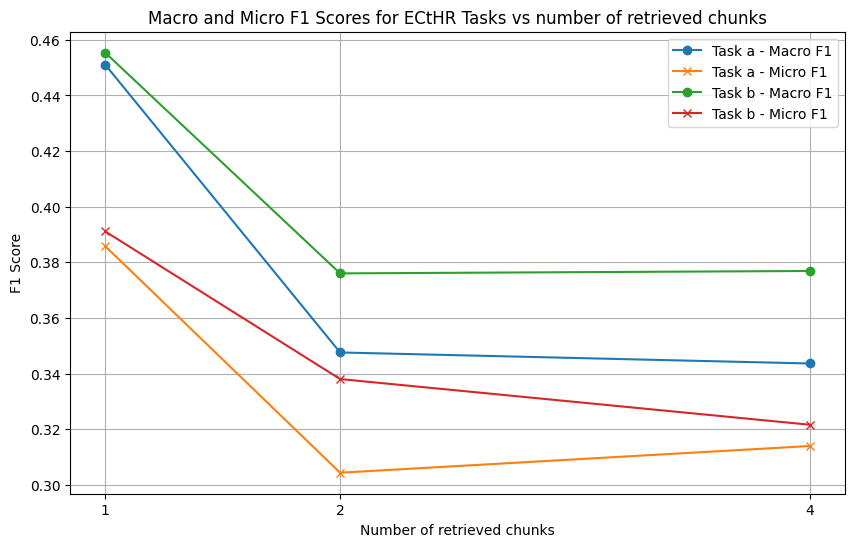

In [24]:
import matplotlib.pyplot as plt

# Sample data
results = [
    {'task': 'a', 'n': 1, 'macro_f1': 0.45106060606060605, 'micro_f1': 0.38578680203045684},
    {'task': 'a', 'n': 2, 'macro_f1': 0.34759418845143375, 'micro_f1': 0.30434782608695654},
    {'task': 'a', 'n': 4, 'macro_f1': 0.34362318840579714, 'micro_f1': 0.313953488372093},
    {'task': 'b', 'n': 1, 'macro_f1': 0.4553716755519413, 'micro_f1': 0.39111111111111113},
    {'task': 'b', 'n': 2, 'macro_f1': 0.376027056807838, 'micro_f1': 0.3380281690140845},
    {'task': 'b', 'n': 4, 'macro_f1': 0.37689083820662767, 'micro_f1': 0.32160804020100503}
]

# Separating data for each task and F1 type
data = {'a': {'macro_f1': [], 'micro_f1': [], 'n': []},
        'b': {'macro_f1': [], 'micro_f1': [], 'n': []}}

for item in results:
    task = item['task']
    data[task]['n'].append(item['n'])
    data[task]['macro_f1'].append(item['macro_f1'])
    data[task]['micro_f1'].append(item['micro_f1'])

# Plotting
plt.figure(figsize=(10, 6))

for task in data:
    plt.plot(data[task]['n'], data[task]['macro_f1'], marker='o', label=f'Task {task} - Macro F1')
    plt.plot(data[task]['n'], data[task]['micro_f1'], marker='x', label=f'Task {task} - Micro F1')

plt.xlabel('Number of retrieved chunks')
plt.ylabel('F1 Score')
plt.title('Macro and Micro F1 Scores for ECtHR Tasks vs number of retrieved chunks')
plt.xticks(data['a']['n'])  # Assuming 'n' values are the same for both tasks
plt.legend()
plt.grid(True)
plt.savefig('ablation.png', dpi=450)

plt.show()
